In [ ]:
# Initial imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
import seaborn as sns
import pygal  

# Data cleaning  
## In this section, we will need to read the CSV file into DataFrame and perform any necessary data cleaning steps

In [97]:
# Reading data

def dfmake(path):
    """
    Read in a CSV File into a dataframe, and convert date into a datetimeindex
    Args:
        path : The filename and path of the csv file
    Returns:
        The dataframe converted from the CSV file
    """
    path_df=pd.read_csv(path, index_col='Date', infer_datetime_format=True, parse_dates=True)
    return path_df

In [98]:
#import Combined Dataframe
combined_df=dfmake("US&CA Dataset.csv")
combined_df.head()


,Inflation_US,Inflation_CA,Covid_Cases_US,Covid_Cases_CA
Date,,,,
2021-12-01,7.1,1.9,1857993914,70660679
2021-11-01,6.8,1.9,1418982171,52864275
2021-10-01,6.2,2.0,1392031827,52220644
2021-09-01,5.4,2.2,1249406449,47080268
2021-08-01,5.3,2.4,1150163602,45460750


In [99]:
# Count nulls
combined_df.isnull().sum()

Inflation_US      0
Inflation_CA      1
Covid_Cases_US    0
Covid_Cases_CA    0
dtype: int64

In [100]:
# Check Data Types
combined_df.dtypes

Inflation_US      float64
Inflation_CA      float64
Covid_Cases_US      int64
Covid_Cases_CA      int64
dtype: object

# Conduct Quantitative Analysis


In [ ]:
#plot US Covid cases
#combined_df["Covid_Cases_US"].plot.bar(figsize=(20,10), title= "US covide cases")

###  Plot data using parallel_coordinates plot

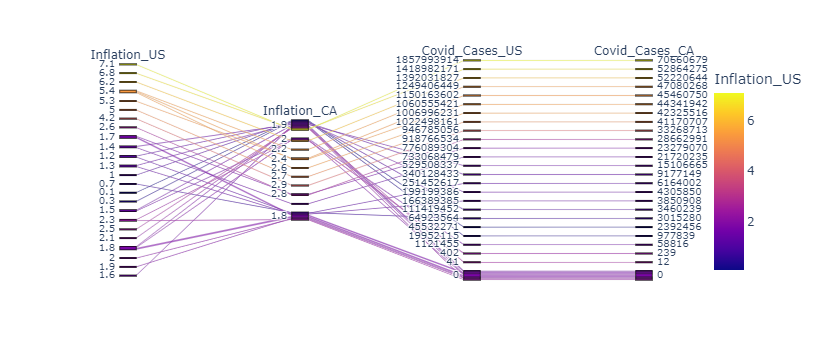

In [47]:
px.parallel_categories(
    combined_df,
    dimensions=["Inflation_US","Inflation_CA","Covid_Cases_US","Covid_Cases_CA"],
    color="Inflation_US",
)

##  Visualize the data using bar charts and the Pandas plot function. 

In [ ]:
#plot Canada covid cases
#combined_df["Covid_Cases_CA"].sort_values(ascending=False).plot.bar(figsize=(30,15), title= "CA covide cases")


In [ ]:
#plot US Inflation
#combined_df["Inflation_US"].sort_values(ascending=False).plot.bar(figsize=(30,15), title= "The inflation Rate of US")

In [ ]:
#plot Canada Inflation
#combined_df["Inflation_CA"].sort_values(ascending=False).plot.bar(figsize=(30,20),title= "The inflation Rate of CANADA ")

# Average covid cases in US and Canada 

In [85]:
# Calculate the average covid cases  for US and Canada 
avg_covid_cases=(combined_df[["Covid_Cases_US","Covid_Cases_CA"]]
         .groupby(combined_df.index).mean())
avg_covid_cases.head()


,Covid_Cases_US,Covid_Cases_CA
Date,,
2019-01-01,0.0,0.0
2019-02-01,0.0,0.0
2019-03-01,0.0,0.0
2019-04-01,0.0,0.0
2019-05-01,0.0,0.0


In [ ]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig=plt.figure()
    line_plot=data.plot.line(color=color) 
    line_plot.set_xlabel(xlabel)
    line_plot.set_ylabel(ylabel)
    line_plot.set_title(title)

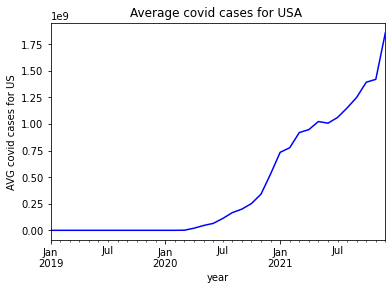

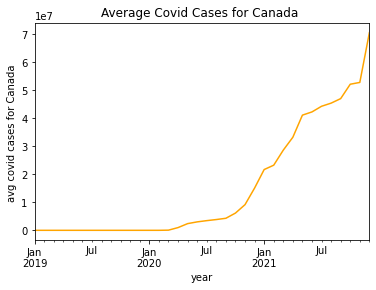

In [86]:
# Line chart for US covid cases 
create_line_chart(avg_covid_cases["Covid_Cases_US"],
                  title="Average covid cases for USA ",
                 ylabel="AVG covid cases for US", xlabel="year",color="blue")
# Line chart for CANADA COVID CASES
create_line_chart(avg_covid_cases["Covid_Cases_CA"],
                  title="Average Covid Cases for Canada ",
                 ylabel="avg covid cases for Canada ", xlabel="year",color="orange")

# Calculate and plot the correlation

In [59]:
# Calculate the correlation
correlation=combined_df.corr()

# Display de correlation matrix
correlation

,Inflation_US,Inflation_CA,Covid_Cases_US,Covid_Cases_CA
Inflation_US,1.000000,0.423619,0.873074,0.909902
Inflation_CA,0.423619,1.000000,0.559704,0.544291
Covid_Cases_US,0.873074,0.559704,1.000000,0.992986
Covid_Cases_CA,0.909902,0.544291,0.992986,1.000000


## use the heatmap to plot the correlation 

<AxesSubplot:>

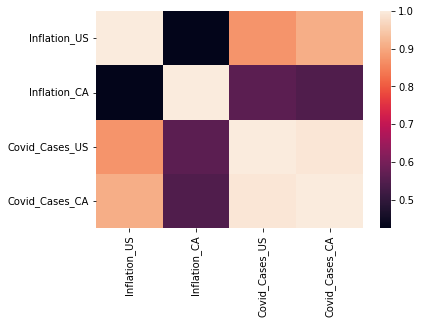

In [93]:
sns.heatmap(correlation) #, vmin=-1, vmax=1)

## Use the parallel coordinate to plot the correlation

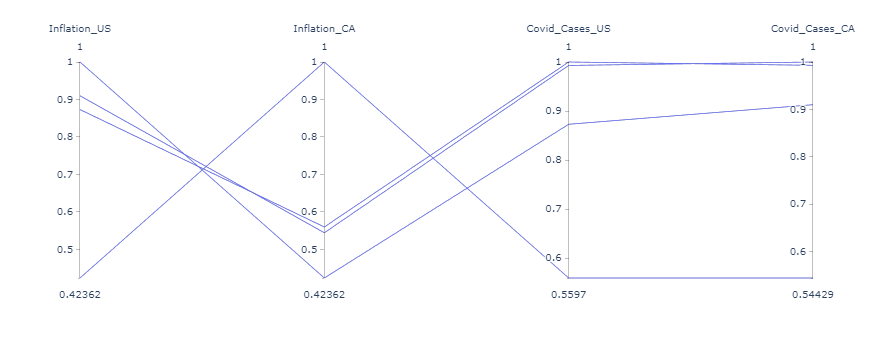

In [92]:
# Plot data using parallel_coordinates plot
px.parallel_coordinates(correlation)

# Rolling Statistics

In [102]:
#Calculate and plot the rolling standard deviation for inflation rate of US  and Canada
inflation_rate=combined_df[["Inflation_US","Inflation_CA"]]
inflation_rate.head()

,Inflation_US,Inflation_CA
Date,,
2021-12-01,7.1,1.9
2021-11-01,6.8,1.9
2021-10-01,6.2,2.0
2021-09-01,5.4,2.2
2021-08-01,5.3,2.4


<AxesSubplot:xlabel='Date'>

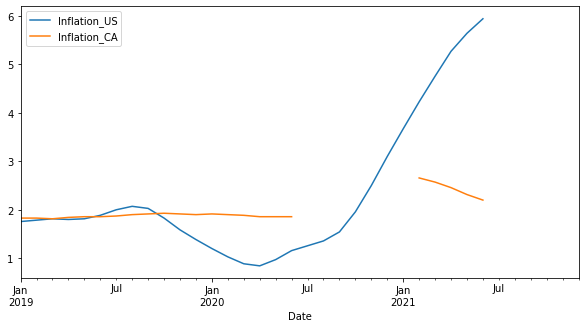

In [105]:
inflation_rate.rolling(window= 7).mean().plot(figsize=(10,5))

### Calculate and Plot Beta for inflation rate in US and canada 

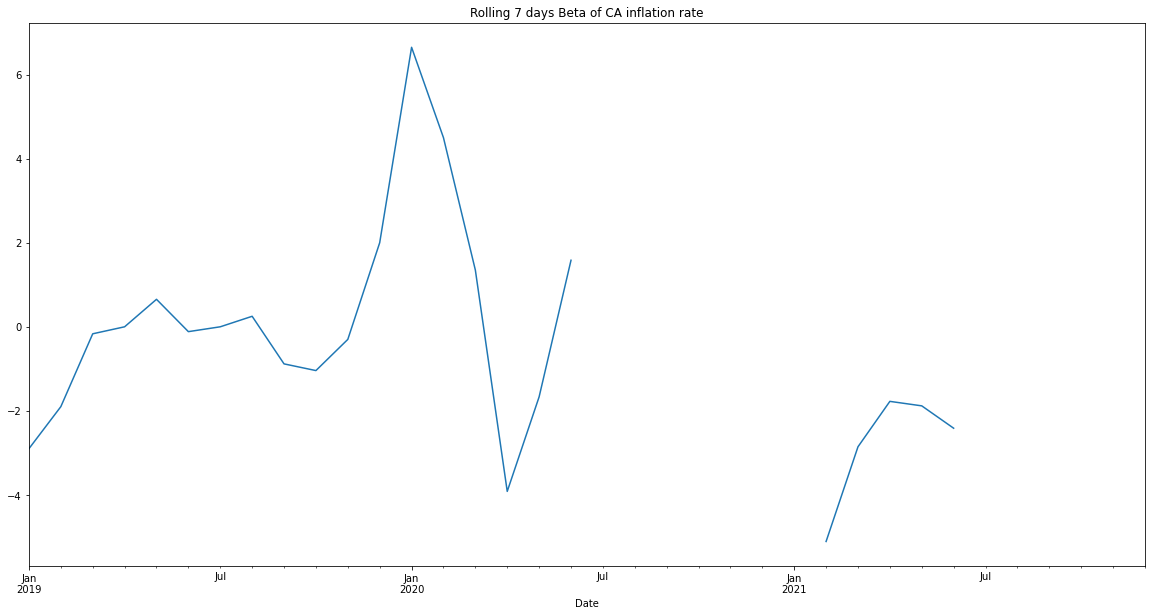

In [111]:
# Calculate covariance of inflation rate of canada 

covariance=inflation_rate["Inflation_US"].rolling(window=7).cov(inflation_rate["Inflation_CA"])

# Calculate variance of canada inflation
variance=inflation_rate["Inflation_CA"].rolling(window=7).var()

# Computing beta


beta=covariance/variance

# Plot beta trend

plot=beta.plot(figsize=(20, 10), title="Rolling 7 days Beta of CA inflation rate")
